<a href="https://colab.research.google.com/github/airoprojects/visiope/blob/main/load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt



In [3]:
!unzip "/content/drive/MyDrive/Dataset/ai4mars-dataset-merged-0.1.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247095EDR_F0610252NCAM00654M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247119EDR_F0610252NCAM00654M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247151EDR_F0610252NCAM00654M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247174EDR_F0610252NCAM00654M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247213EDR_F0610252NCAM00267M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247238EDR_F0610252NCAM00267M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247269EDR_F0610252NCAM00267M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_540247322EDR_F0610252NCAM00268M1.png  
  inflating: /content/ai4mars-dataset-merged-0.1/msl/labels/train/NLB_5402473

(5000, 224, 224, 3) (5000, 224, 224)


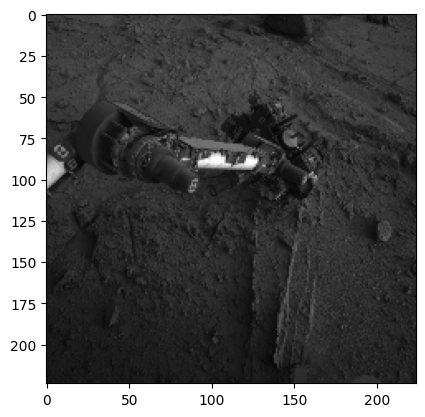

In [ ]:

#Path
images = "ai4mars-dataset-merged-0.1/msl/images"
label_train = "ai4mars-dataset-merged-0.1/msl/labels/train"
edr = images + "/edr"
mxy = images + "/mxy"
rng = images + "/rng-30m"


edr_files = os.listdir(edr)
label_train_files = os.listdir(label_train)



X = []
y = []
c = 0

# input
len_resize = 224

for label in label_train_files:
    
    img_name = label[:-4] + ".JPG" #Names of images match names of labels, except for the extension (JPG, png)

    if img_name in edr_files:

        img_path = os.path.join(edr, img_name) #get the full path
        
        # this is ugly, to change!
        img_arr = cv2.imread(img_path) #read image
        img_arr = cv2.resize(img_arr, dsize=(len_resize, len_resize)) #resize


        label_path = os.path.join(label_train, label)
        lab_arr = cv2.imread(label_path,0) #0 mean read as greyscale image
        lab_arr = cv2.resize(lab_arr, (len_resize,len_resize), interpolation = cv2.INTER_NEAREST)

        X.append(img_arr)
        y.append(lab_arr)

        #this control how much images you want
        c+=1
        if c==5000: break


X = np.asanyarray(X, dtype= np.float32) / 255
y = np.array(y, dtype= np.int64)

# 0 - soil --> 0
# 1 - bedrock --> 1
# 2 - sand --> 2
# 3 - big rock --> 3
# 255 -> 4 - NULL (no label)


y[y==255] = 4

print(X.shape, y.shape)


plt.imshow(X[0])
plt.show()